## Выявление искуственно сгенерированных данных

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.cluster import DBSCAN
from sklearn.cluster import KMeans
from sklearn.ensemble import IsolationForest
from sklearn.metrics import silhouette_score

### 1. Data loading and preprocessing

In [2]:
data = pd.read_csv('../../data/merged.csv')
data.head()

,"Количество отвердителя, м.%","Содержание эпоксидных групп, %","Температура вспышки, С","Потребление смолы, г/м2","Угол нашивки, град",Шаг нашивки,Плотность нашивки,"Плотность, кг/м3","Поверхностная плотность, г/м2","Модуль упругости, ГПа",Соотношение матрица-наполнитель,"Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа"
0,30.00,22.267857,100.000000,220.0,0,4.0,57.0,2030.0,210.0,738.736842,1.857143,70.0,3000.0
1,50.00,23.750000,284.615385,220.0,0,4.0,60.0,2030.0,210.0,738.736842,1.857143,70.0,3000.0
2,49.90,33.000000,284.615385,220.0,0,4.0,70.0,2030.0,210.0,738.736842,1.857143,70.0,3000.0
3,129.00,21.250000,300.000000,220.0,0,5.0,47.0,2030.0,210.0,738.736842,1.857143,70.0,3000.0
4,111.86,22.267857,284.615385,220.0,0,5.0,57.0,2030.0,210.0,753.000000,2.771331,70.0,3000.0


In [3]:
# Масштабирование в диапазоне от 0 до 1
data_scale = (data - data.min(axis=0)) / (data.max(axis=0) - data.min(axis=0))

In [3]:
X_nup = pd.read_excel('../../data/raw/X_nup.xlsx', index_col=0)

# Масштабирование в диапазоне от 0 до 1
X_nup_scale = (X_nup - X_nup.min(axis=0)) / (X_nup.max(axis=0) - X_nup.min(axis=0))


### 2. DBSCAN

In [107]:
# Перебрать словарь с параметрами

db = DBSCAN(eps=0.4, min_samples=15).fit(data_scale)
data_pred = db.fit_predict(data_scale)
np.unique(data_pred)

array([-1,  0,  1], dtype=int64)

In [108]:
print('Размер датасета -', data.shape[0])
print('Размер класса 0 -', np.count_nonzero(data_pred == 0))
print('Размер класса -1 -', np.count_nonzero(data_pred == -1))
print('Размер класса 1 -', np.count_nonzero(data_pred == 1))

Размер датасета - 1023
Размер класса 0 - 125
Размер класса -1 - 683
Размер класса 1 - 215


In [109]:
# Добавим колонку с меткой класса
data_db = data_scale.copy()
data_db['label'] = data_pred

<Axes: xlabel='Шаг нашивки', ylabel='Count'>

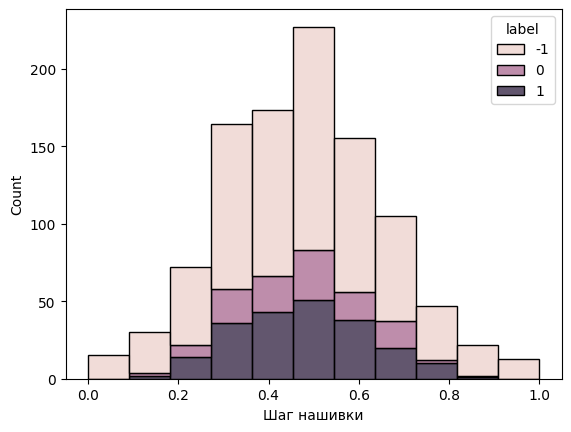

In [7]:
sns.histplot(data_db, x='Шаг нашивки', hue='label', bins=11, multiple="stack")

<Axes: xlabel='Шаг нашивки', ylabel='Count'>

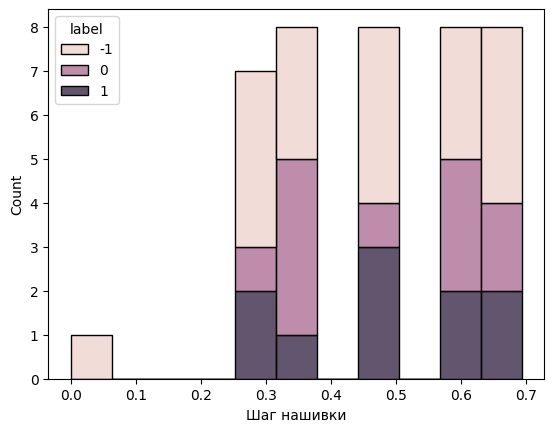

In [8]:
sns.histplot(data_db[:40], x='Шаг нашивки', hue='label', bins=11, multiple="stack")

### Isolation Forest

<font size=4>Весь датасет</font>

[-1  1]


<Axes: xlabel='Шаг нашивки', ylabel='Count'>

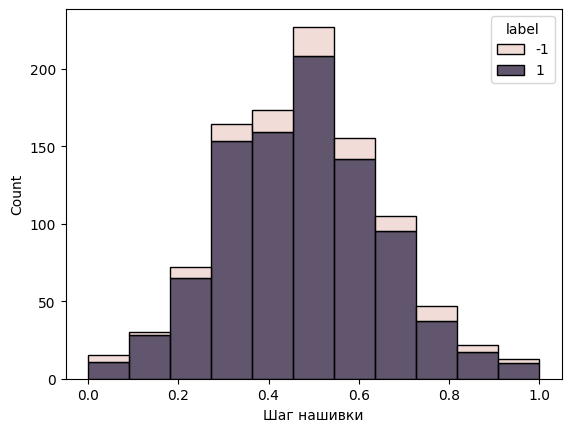

In [92]:
isolat = IsolationForest(n_estimators=100, max_samples=200, random_state=0)
data_isolat_label = isolat.fit_predict(data_scale)

print(np.unique(data_isolat_label))

# Добавим колонку с меткой класса
data_isolat = data_scale.copy()
data_isolat['label'] = data_isolat_label

sns.histplot(data_isolat, x='Шаг нашивки', hue='label', bins=11, multiple="stack")

<Axes: xlabel='Шаг нашивки', ylabel='Count'>

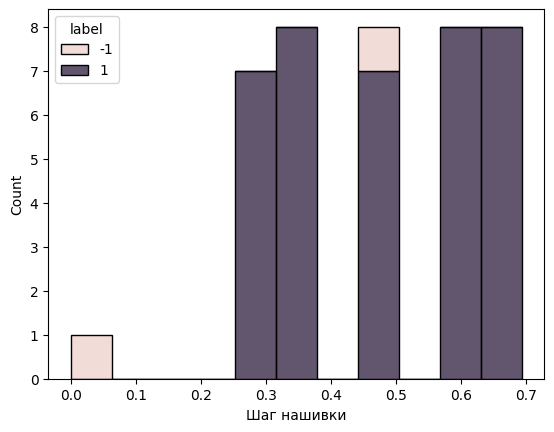

In [93]:
sns.histplot(data_isolat[:40], x='Шаг нашивки', hue='label', bins=11, multiple="stack")

**Почитать об этих метриках**

In [13]:
# Метрика для DBSCAN
dbscan_silhouette = silhouette_score(data_scale, data_db['label'])
print('DBSCAN Silhouette Score:', dbscan_silhouette)

# Метрика для Isolation Forest
silhouette = silhouette_score(data_scale, data_scale['label'])
print('Isolation Forest Silhouette Score:', silhouette)

DBSCAN Silhouette Score: -0.07816246905929228
DBSCAN Calinski-Harabasz Index: 67.95626880474205
Isolation Forest Silhouette Score: 0.5595571186852315
Isolation Forest Calinski-Harabasz Index: 641.6823496723691


График для числа кластеров  
https://github.com/tirthajyoti/Machine-Learning-with-Python/blob/master/Clustering-Dimensionality-Reduction/Clustering_metrics.ipynb

<font size=4>По файлу X_nup</font>

[-1  1]


<Axes: xlabel='Шаг нашивки', ylabel='Count'>

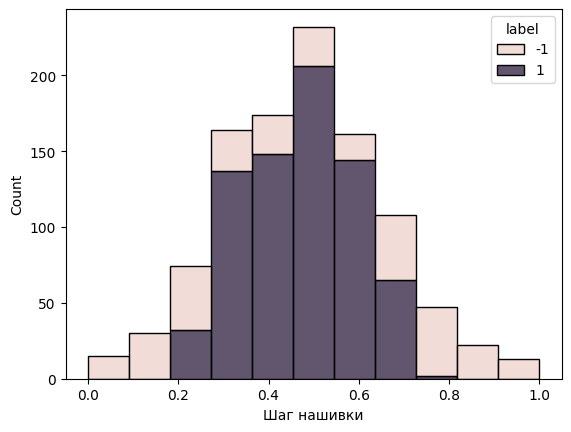

In [4]:
isolat = IsolationForest(n_estimators=100, max_samples=300, random_state=0)
X_nup_isolat_label = isolat.fit_predict(X_nup_scale)

print(np.unique(X_nup_isolat_label))

# Добавим колонку с меткой класса
X_nup_isolat = X_nup_scale.copy()
X_nup_isolat['label'] = X_nup_isolat_label

sns.histplot(X_nup_isolat, x='Шаг нашивки', hue='label', bins=11, multiple="stack")

<Axes: xlabel='Шаг нашивки', ylabel='Count'>

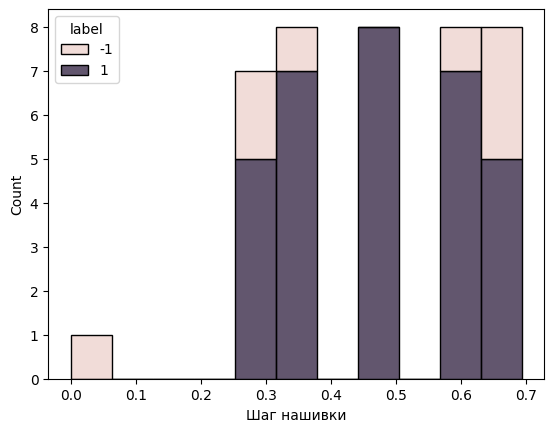

In [105]:
sns.histplot(X_nup_isolat[:40], x='Шаг нашивки', hue='label', bins=11, multiple="stack")

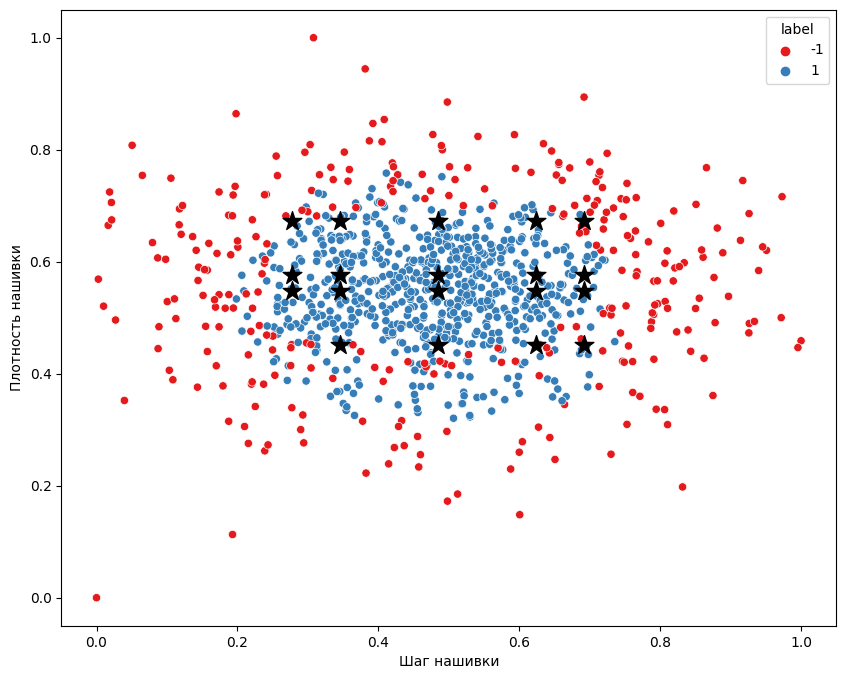

In [106]:
plt.figure(figsize=(10,8))

sns.scatterplot(
                X_nup_isolat, x='Шаг нашивки',
                y="Плотность нашивки",
                hue='label', palette="Set1"
                )
plt.scatter(X_nup_isolat[:19]['Шаг нашивки'], 
            X_nup_isolat[:19]['Плотность нашивки'],
            s=200, marker='*', c='black')

Isolation Forest больше подхолит для выявления аномалий и выбросов.

### K-Means

<font size=4>Весь датасет</font>

E:\Документы\Data Science\Projects\Diploma-Project-Bauman-MSTU\baumanenv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


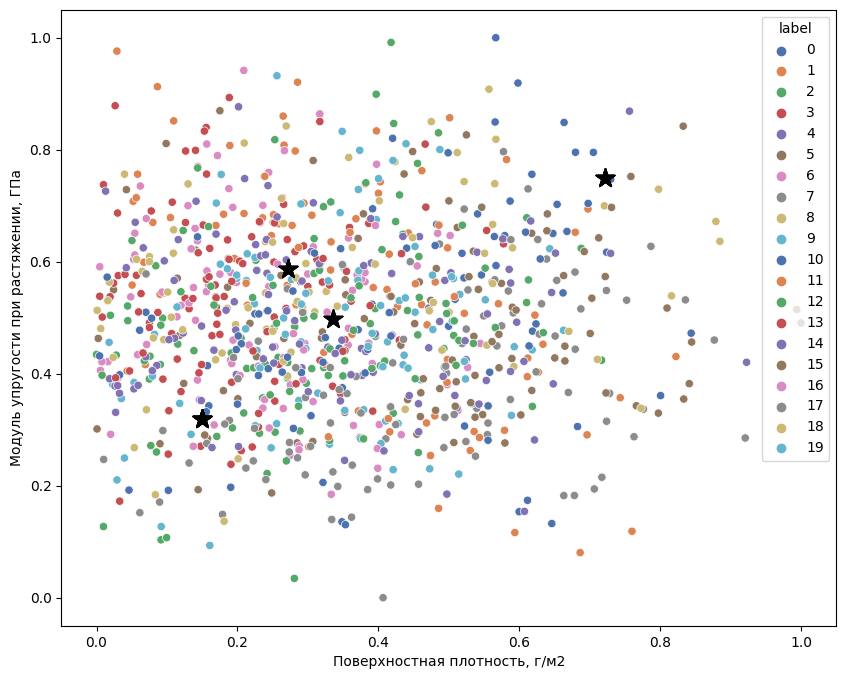

In [91]:
kmeans = KMeans(20, random_state=0)
data_kmeans_label = kmeans.fit_predict(data_scale)


# Добавим колонку с меткой класса
data_kmeans = data_scale.copy()
data_kmeans['label'] = data_kmeans_label


<Axes: xlabel='Шаг нашивки', ylabel='Count'>

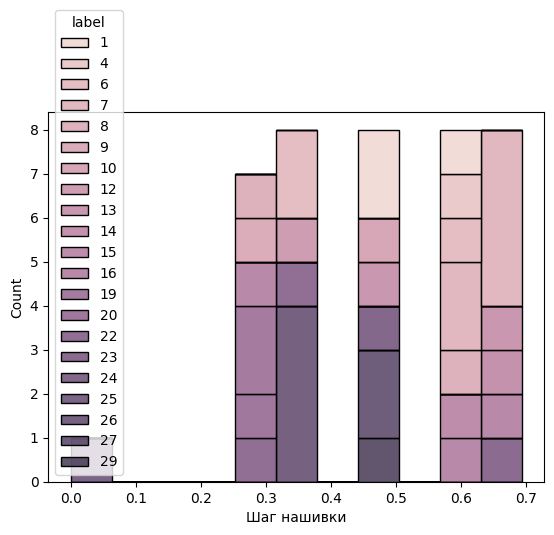

In [18]:
sns.histplot(data_kmeans[:40], x='Шаг нашивки', hue='label', bins=11, multiple="stack")

<font size=4>По файлу X_nup</font>

E:\Документы\Data Science\Projects\Diploma-Project-Bauman-MSTU\baumanenv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


[ 0  1  2  3  4  5  6  7  8  9 10 11]


<Axes: xlabel='Шаг нашивки', ylabel='Count'>

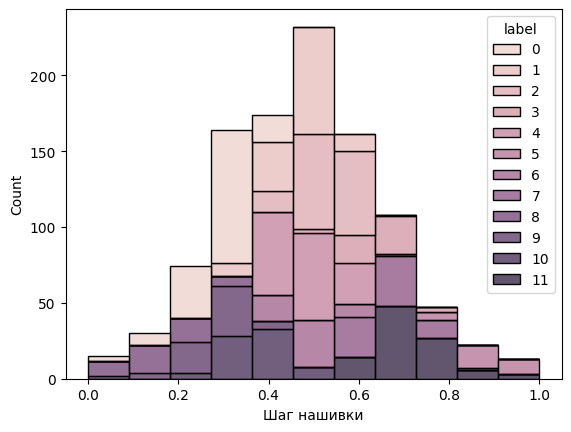

In [34]:
kmeans = KMeans(12, random_state=0)
X_nup_kmeans_label = kmeans.fit_predict(X_nup_scale)

print(np.unique(X_nup_kmeans_label))

# Добавим колонку с меткой класса
X_nup_kmeans = X_nup_scale.copy()
X_nup_kmeans['label'] = X_nup_kmeans_label

sns.histplot(X_nup_kmeans, x='Шаг нашивки', hue='label', bins=11, multiple="stack")

<Axes: xlabel='Шаг нашивки', ylabel='Count'>

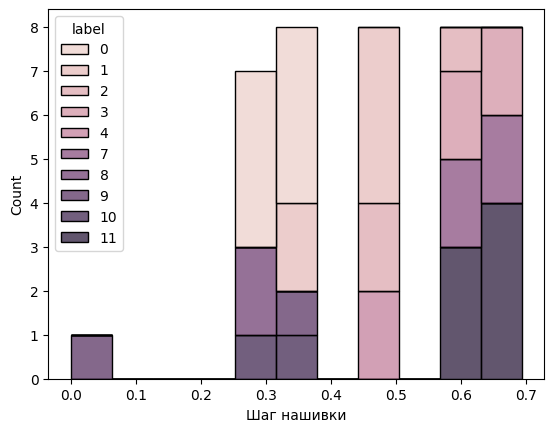

In [35]:
sns.histplot(X_nup_kmeans[:40], x='Шаг нашивки', hue='label', bins=11, multiple="stack")

<font size=4>По двум столбцам</font>  
Шаг нашивки - Плотность нашивки

E:\Документы\Data Science\Projects\Diploma-Project-Bauman-MSTU\baumanenv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


<Axes: xlabel='Шаг нашивки', ylabel='Count'>

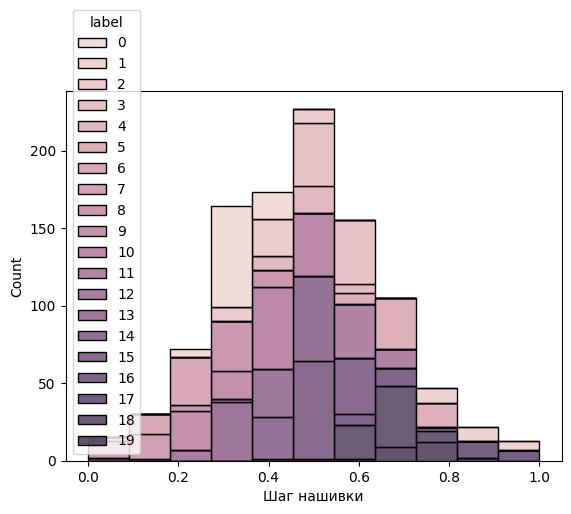

In [87]:
kmeans = KMeans(20, random_state=0)
data_kmeans_label = kmeans.fit_predict(data_scale[['Шаг нашивки', "Плотность нашивки"]])

# Добавим колонку с меткой класса
data_kmeans = data_scale.copy()
data_kmeans['label'] = data_kmeans_label

sns.histplot(data_kmeans, x='Шаг нашивки', hue='label', bins=11, multiple="stack")

<Axes: xlabel='Шаг нашивки', ylabel='Count'>

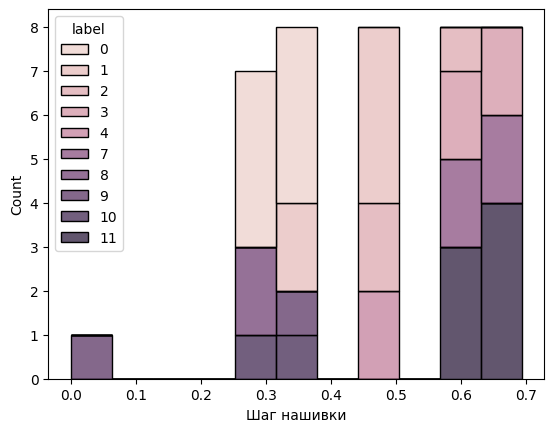

In [40]:
sns.histplot(X_nup_kmeans[:40], x='Шаг нашивки', hue='label', bins=11, multiple="stack")

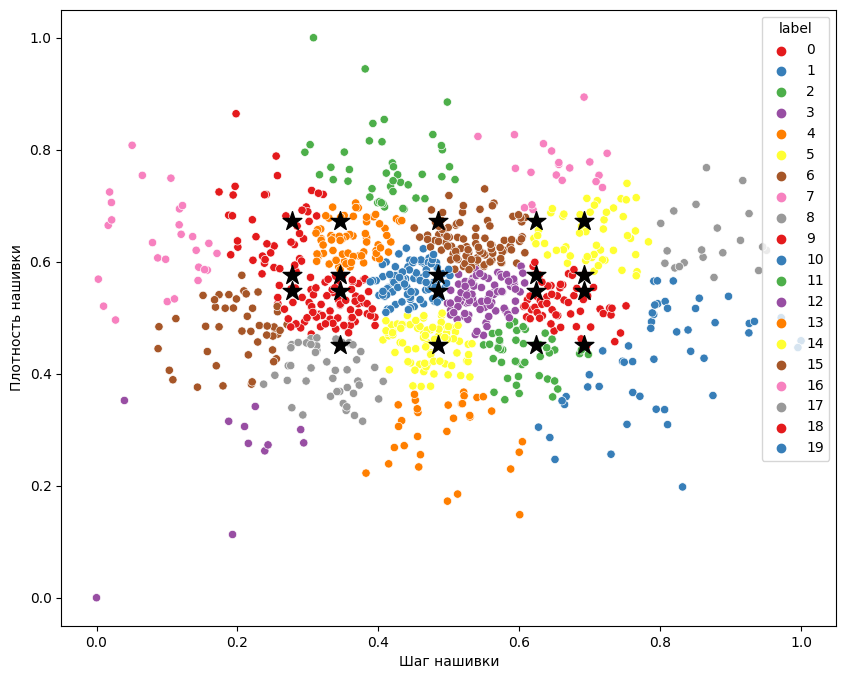

In [88]:
plt.figure(figsize=(10,8))

sns.scatterplot(
                data_kmeans, x='Шаг нашивки',
                y="Плотность нашивки",
                hue='label', palette="Set1"
                )
plt.scatter(data_kmeans[:19]['Шаг нашивки'], 
            data_kmeans[:19]['Плотность нашивки'], 
            s=200, marker='*', c='black')

Поверхностная плотность - Модуль упругости при растяжении

In [73]:
kmeans = KMeans(26, random_state=0)
data_kmeans_label = kmeans.fit_predict(data_scale[['Поверхностная плотность, г/м2', "Модуль упругости при растяжении, ГПа"]])

# Добавим колонку с меткой класса
data_kmeans = data_scale.copy()
data_kmeans['label'] = data_kmeans_label

E:\Документы\Data Science\Projects\Diploma-Project-Bauman-MSTU\baumanenv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


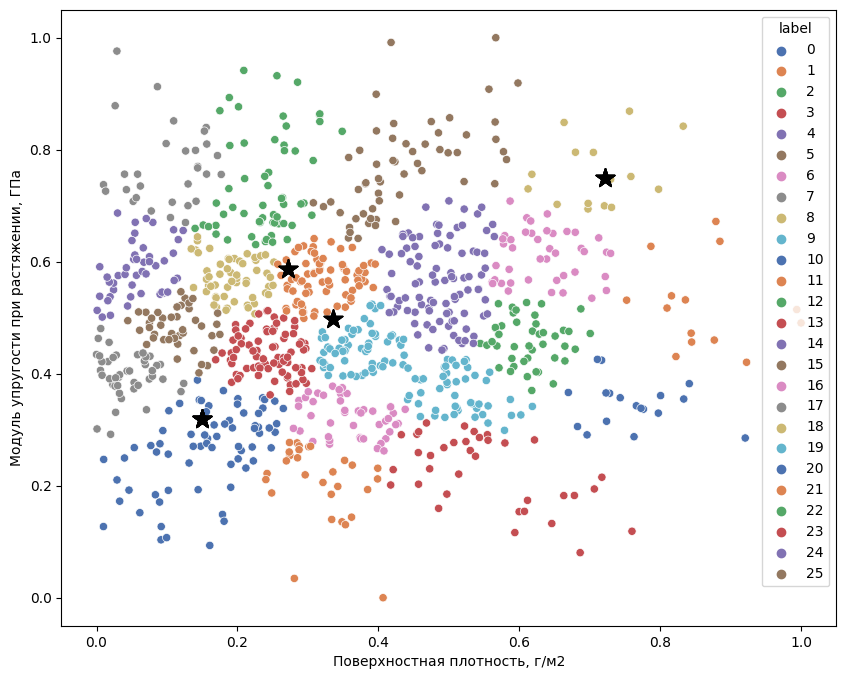

In [77]:
plt.figure(figsize=(10,8))

sns.scatterplot(
                data_kmeans, x='Поверхностная плотность, г/м2',
                y="Модуль упругости при растяжении, ГПа",
                hue='label', palette="deep"
                )
plt.scatter(data_kmeans[:21]['Поверхностная плотность, г/м2'], 
            data_kmeans[:21]['Модуль упругости при растяжении, ГПа'], 
            s=200, marker='*', c='black')

Количество отвердителя - Содержание эпоксидных групп

E:\Документы\Data Science\Projects\Diploma-Project-Bauman-MSTU\baumanenv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


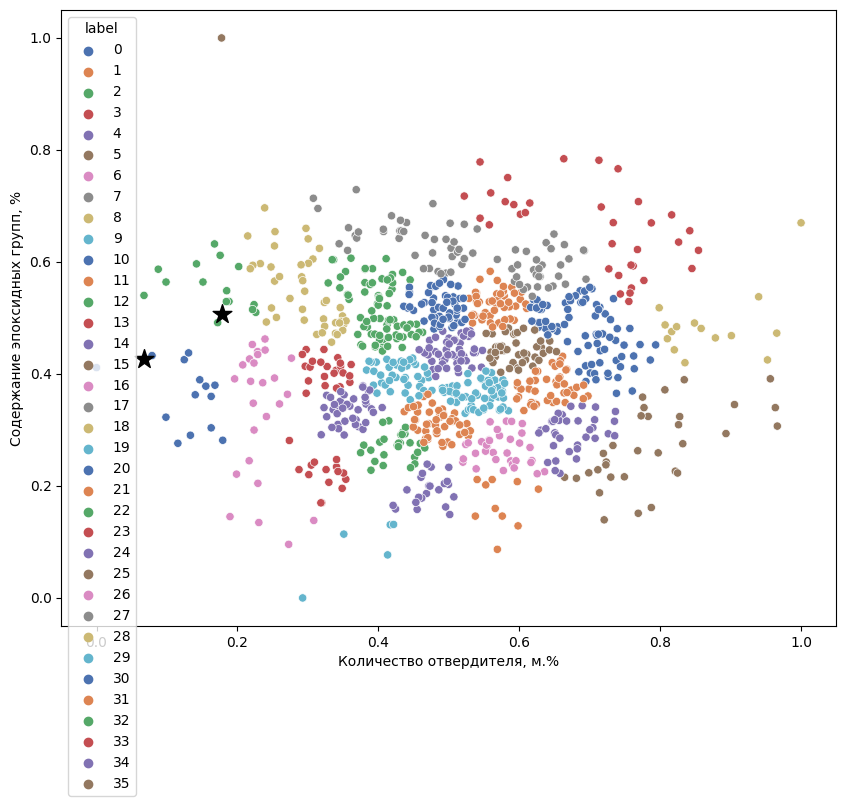

In [118]:
kmeans = KMeans(36, random_state=0)
data_kmeans_label = kmeans.fit_predict(data_scale[['Количество отвердителя, м.%', "Содержание эпоксидных групп, %"]])

# Добавим колонку с меткой класса
data_kmeans = data_scale.copy()
data_kmeans['label'] = data_kmeans_label

plt.figure(figsize=(10,8))
sns.scatterplot(
                data_kmeans, x='Количество отвердителя, м.%',
                y="Содержание эпоксидных групп, %",
                hue='label', palette="deep"
                )
plt.scatter(data_kmeans[:2]['Количество отвердителя, м.%'], 
            data_kmeans[:2]['Содержание эпоксидных групп, %'], 
            s=200, marker='*', c='black')

Модуль упругости при растяжении - Прочность при растяжении

E:\Документы\Data Science\Projects\Diploma-Project-Bauman-MSTU\baumanenv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


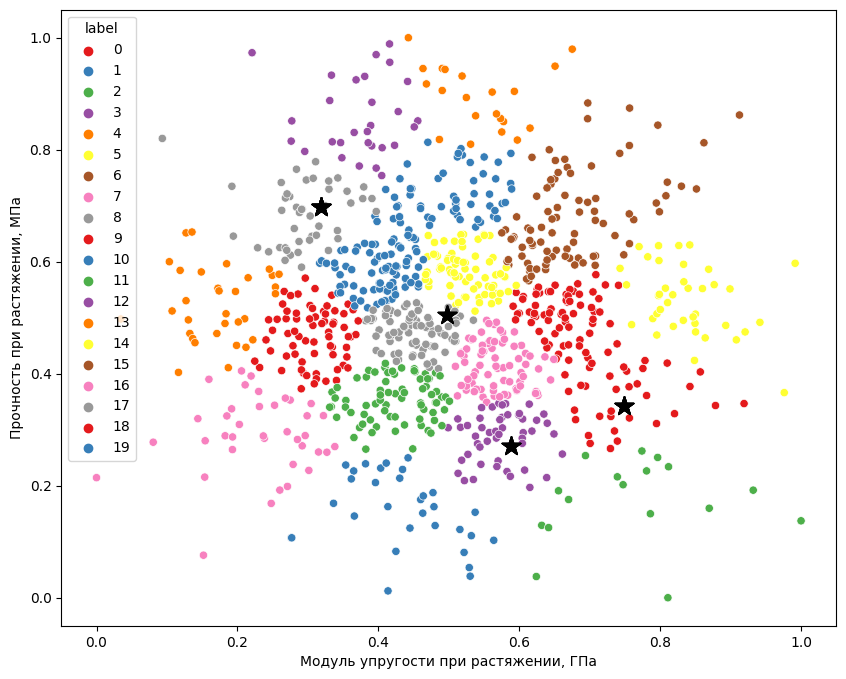

In [125]:
kmeans = KMeans(20, random_state=0)
data_kmeans_label = kmeans.fit_predict(data_scale[['Модуль упругости при растяжении, ГПа', "Прочность при растяжении, МПа"]])

# Добавим колонку с меткой класса
data_kmeans = data_scale.copy()
data_kmeans['label'] = data_kmeans_label

plt.figure(figsize=(10,8))
sns.scatterplot(
                data_kmeans, x='Модуль упругости при растяжении, ГПа',
                y="Прочность при растяжении, МПа",
                hue='label', palette="Set1"
                )
plt.scatter(data_kmeans[:21]['Модуль упругости при растяжении, ГПа'], 
            data_kmeans[:21]['Прочность при растяжении, МПа'], 
            s=200, marker='*', c='black')